In [3]:
from IPython.display import Image
from IPython.display import Video


Este es un ejemplo de código en C que muestra cómo ejecutar una tarea que pone en cero al actuador cada segundo. Además, este código incluye un controlador PID que ajusta el actuador para mantenerlo a un 0.5 de su setpoint.

La tarea se ejecuta utilizando la función vTaskActuador, que establece el valor del actuador en cero utilizando la función setActuador. La tarea activa su PID a un variable y poder observar en el osciloscopio su valor y variacion.

Por otro lado, el controlador PID se implementa utilizando la función `arm_pid_f32`, que toma como entrada el valor del sensor y el setpoint deseado, y calcula la salida del controlador utilizando una combinación de la retroalimentación proporcional, integral y diferencial. En este ejemplo, el valor del setpoint se establece en 0.5.

El controlador PID ajusta continuamente el valor del actuador para mantenerlo lo más cercano posible al valor deseado, y el actuador se actualiza cada segundo mediante la tarea mencionada anteriormente.

Este ejemplo ilustra cómo se pueden utilizar las tareas y los controladores en C para automatizar y controlar dispositivos en tiempo real. Además, muestra cómo el controlador PID puede ajustar la salida del actuador para mantener un valor objetivo, lo que lo convierte en una herramienta valiosa para el control de procesos industriales y la automatización.

```c
// Función principal
int app_pid(void)
{
    /* ARM PID Instance, float_32 format */
    arm_pid_instance_f32 PID;
    // Inicializar el controlador PID con los parámetros de ganancia Kp, Ki y Kd
    /* Set PID parameters */
    /* Set this for your needs */
    PID.Kp = PID_PARAM_KP;        /* Proporcional */
    PID.Ki = PID_PARAM_KI;        /* Integral */
    PID.Kd = PID_PARAM_KD;        /* Derivative */
    TickType_t lastWakeTime = xTaskGetTickCount();
    /* Initialize PID system, float32_t format */
    arm_pid_init_f32(&PID, 1);
    set_point = 0.5;

    // Bucle de control
    while (1)
    {
        // Leer el valor del sensor de la variable "input"
        float32_t input = read_sensor();
        if(true == enable_pid){
			// Calcular el error de seguimiento
			error = set_point - input;

			// Actualizar la salida del controlador PID
			output = arm_pid_f32(&PID, error);

			if (output > lim_max) {
				output = lim_max;
			} else if (output < lim_min) {
				output = lim_min;
			}
        }
        // Escribir la salida del controlador en el actuador
        write_actuator(output);

        printf ("%d / %d \r\n", ((uint16_t)sample_2), ((uint16_t)dac_convert));
        vTaskDelayUntil(&lastWakeTime, pdMS_TO_TICKS(1000 / 1000));
    }
}

void vTimerCallback(TimerHandle_t xTimer) {
	if(true == enable_pid){
		output =0;
		enable_pid = false;
	}
	else{
		enable_pid = true;
	}

}
void init_pid(void) {
    xTaskCreate(app_pid, "task_identification",configMINIMAL_STACK_SIZE*4, NULL, tskIDLE_PRIORITY + 1, NULL);
    // Crea un temporizador con un tiempo de espera de 1 segundo y una repetición automática
    TimerHandle_t xTimer = xTimerCreate("Timer Example", pdMS_TO_TICKS(1000), pdTRUE, NULL, vTimerCallback);

    // Inicia el temporizador
    xTimerStart(xTimer, 0);
}

```

En la imagen, se podría ver el kit de desarrollo y el osciloscopio funcionando juntos para medir y monitorear el funcionamiento del sistema. Esto podría incluir la visualización de la forma de onda de la señal medida en el osciloscopio, así como la ejecución del código en el kit de desarrollo para controlar el sistema y ajustar la señal medida en consecuencia.

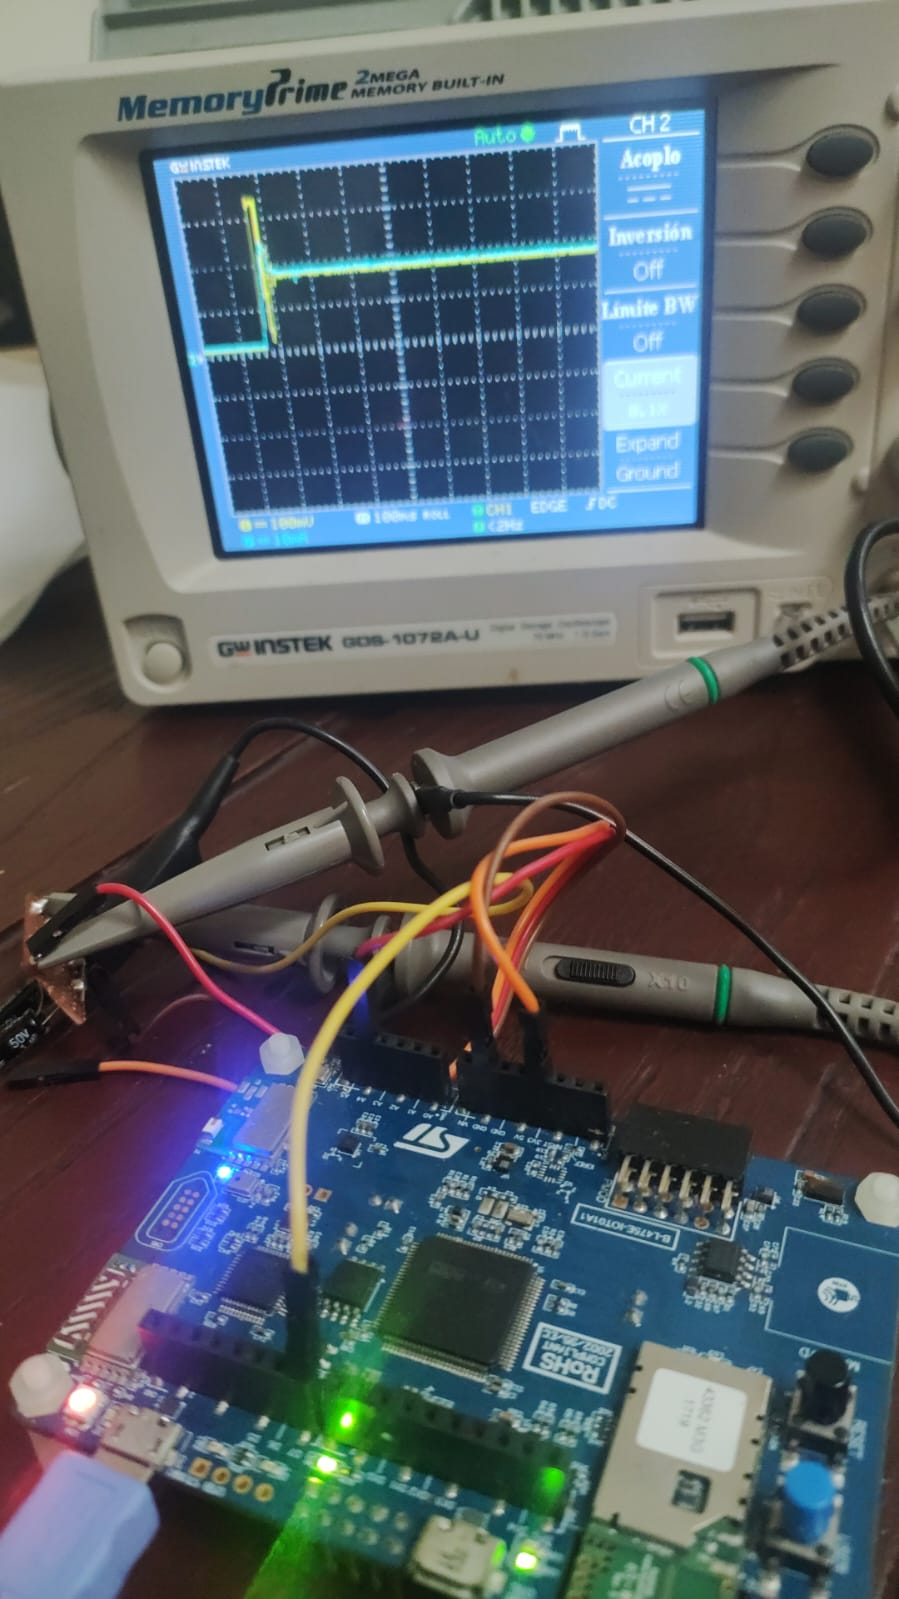

In [5]:
Image(filename="img/2.jpeg", width=400, height=400)

En la imagen, se podría ver el actuador detenido o en su posición inicial después de que la señal de control se ha ajustado a cero. 

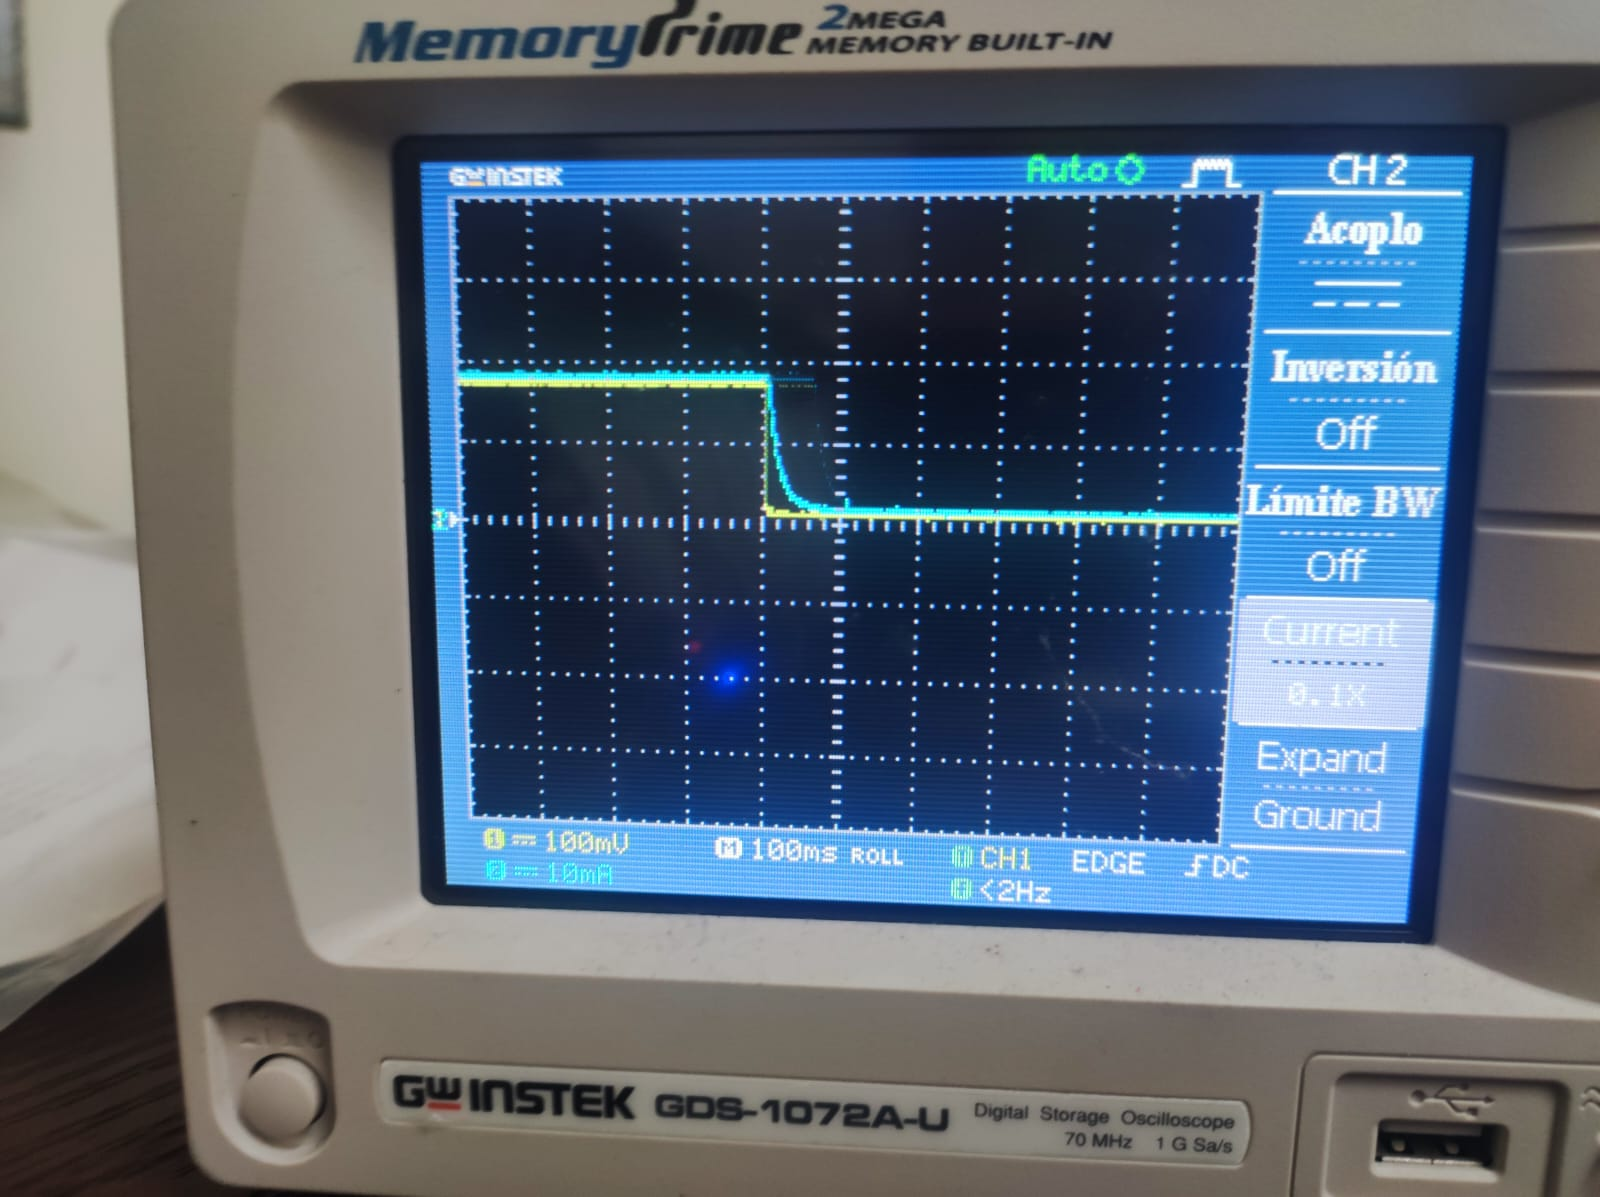

In [6]:
Image(filename="img/3.jpeg", width=400, height=400)

En una imagen que muestra el actuador funcionando con el controlador PID, se puede observar el movimiento del actuador y cómo el controlador PID ajusta continuamente su salida para mantenerlo lo más cerca posible del valor deseado.

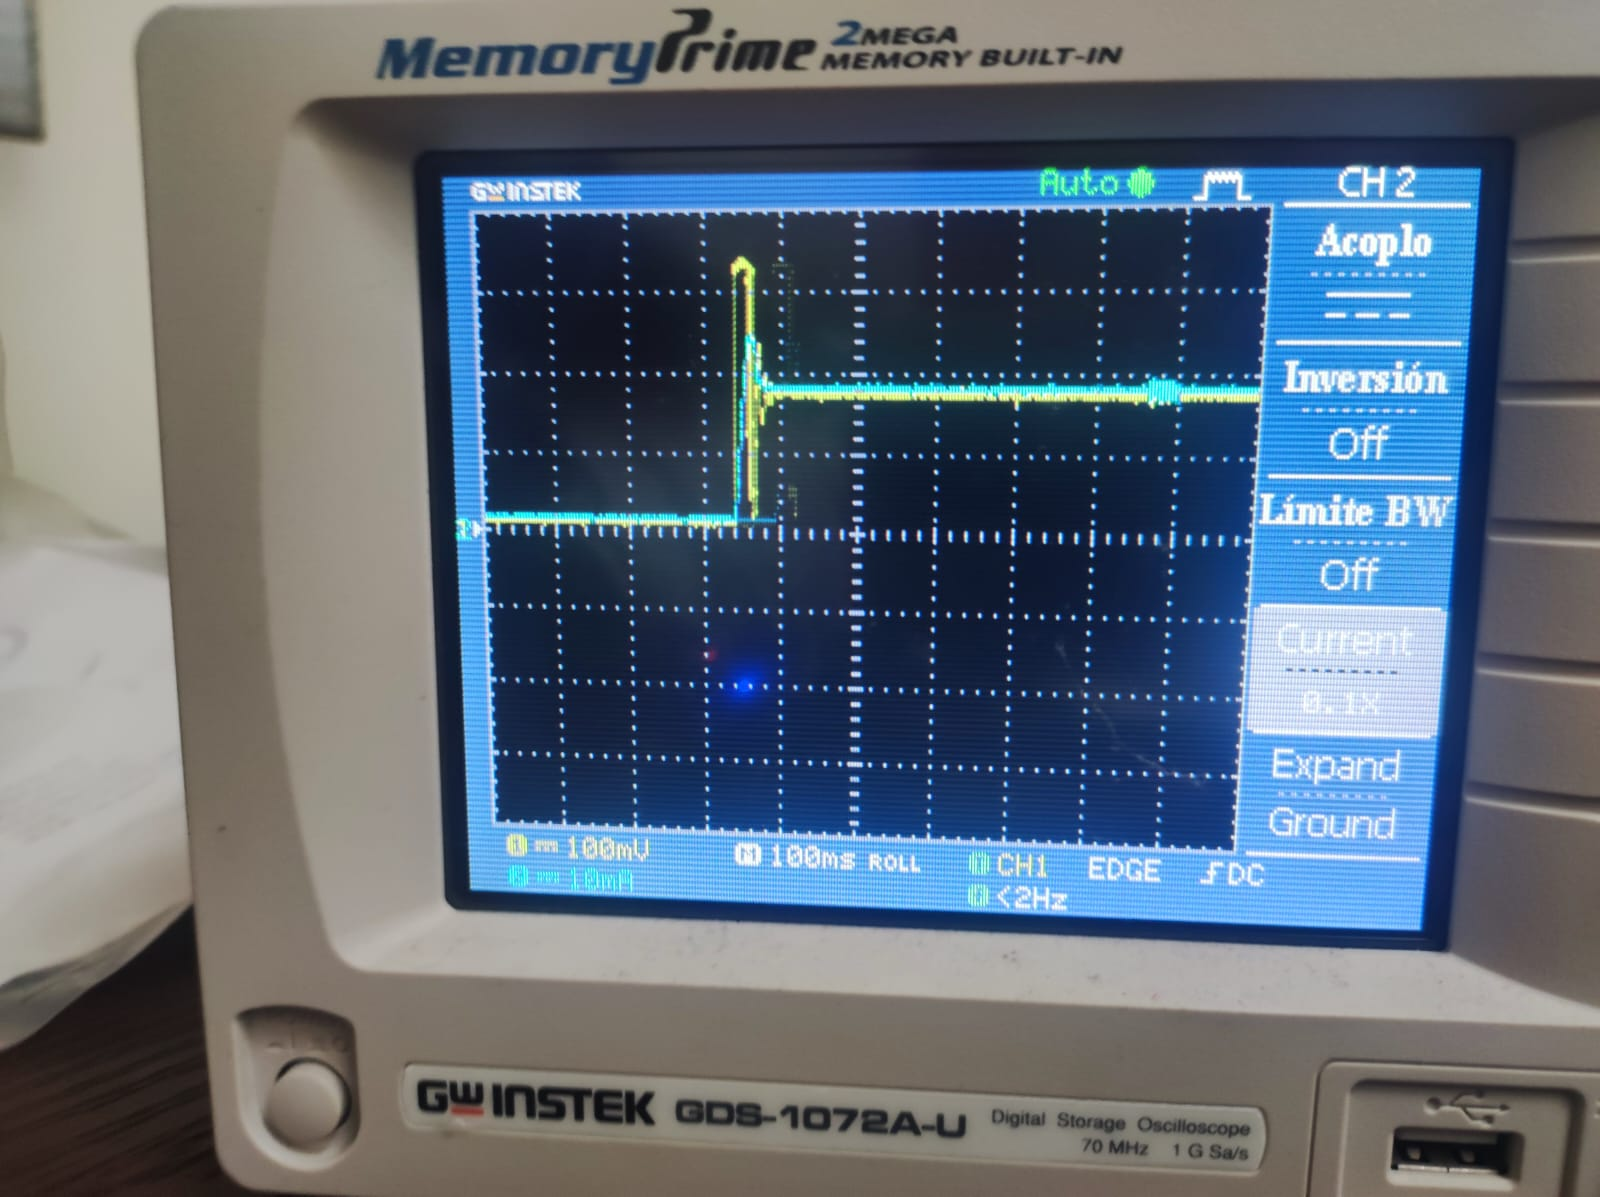

In [7]:
Image(filename="img/4.jpeg", width=400, height=400)

En el siguiente video se muestra el funcionamiento de un controlador PID. Este tipo de controlador se utiliza comúnmente en sistemas de control de retroalimentación para ajustar la salida de un proceso o dispositivo y mantenerlo lo más cerca posible del valor deseado.

El controlador PID utiliza tres componentes: la retroalimentación proporcional, la retroalimentación integral y la retroalimentación derivativa. La retroalimentación proporcional ajusta la salida en función de la diferencia entre el valor deseado y el valor real, la retroalimentación integral tiene en cuenta la acumulación de errores a lo largo del tiempo y la retroalimentación derivativa tiene en cuenta la tasa de cambio de los errores.

El controlador PID utiliza una combinación de estos componentes para calcular la señal de salida y ajustar el proceso o dispositivo de acuerdo con el valor deseado. Esto permite al sistema responder de manera rápida y precisa a las perturbaciones en la señal de entrada y mantener el proceso o dispositivo dentro de los límites deseados.

In [4]:
# Ruta del video en el disco
ruta_video = "img/video.mp4"

# Reproducir el video en el Notebook con un tamaño personalizado
Video(filename=ruta_video, width=400, height=400, embed=True)